# Демонстрационный экзамен по курсу "Анализ данных и машинное обучение"

### 1. Загрузка данных

In [2]:
from google.colab import files
uploaded = files.upload()

Saving regression_2__16_09.csv to regression_2__16_09 (1).csv


In [11]:
import pandas as pd
import seaborn as sns

In [12]:
df = pd.read_csv('regression_2__16_09.csv')
df

,age,sex,profession,income
0,35.0,female,homewife,51667.0
1,26.0,female,homewife,52381.0
2,43.0,female,worker,91316.0
3,35.0,female,homewife,51667.0
4,33.0,female,homewife,51786.0
...,...,...,...,...
9995,43.0,male,worker,111316.0
9996,28.0,male,unemployed,67174.0
9997,40.0,male,unemployed,66429.0
9998,37.0,male,unemployed,66562.0


### 2. Исходные данные
##### Визульный и разведочный анализ данных

In [13]:
# кол-во данных
df.shape

(10000, 4)

In [14]:
# типы данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         9513 non-null   float64
 1   sex         9513 non-null   object 
 2   profession  10000 non-null  object 
 3   income      10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [15]:
# уникальные значения категориальных признаков
print(pd.unique(df['sex']))
print(pd.unique(df['profession']))

['female' nan 'male']
['homewife' 'worker' 'unemployed']


In [16]:
# пропуски в данных
df.isna().sum()

age           487
sex           487
profession      0
income          0
dtype: int64

In [17]:
# дупликаты в данных
df.duplicated().sum()

9673

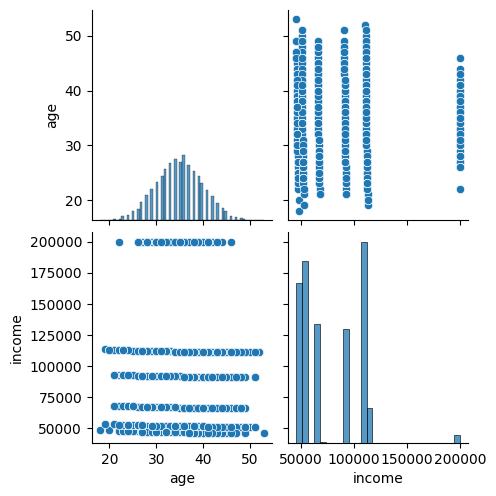

In [18]:
# диаграммы рассеяния кол-ных признаков
sns.pairplot(df)

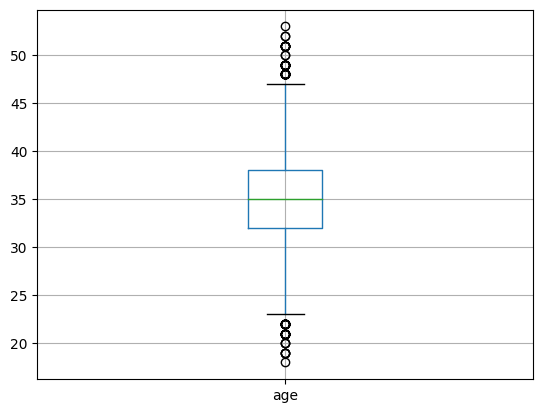

In [19]:
# "ящик с усами" для кол-ых признаков
boxplot_age = df.boxplot(column=['age'])

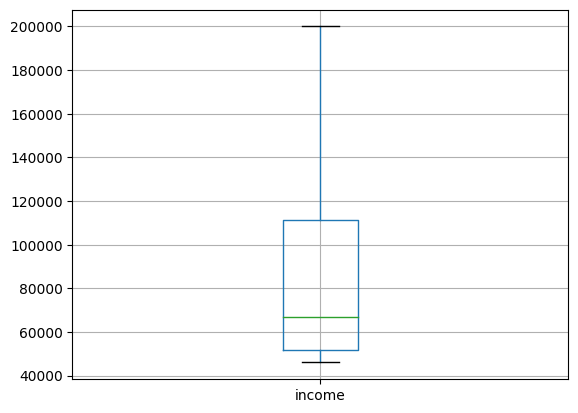

In [20]:
boxplot_income = df.boxplot(column=['income'])

<Axes: >

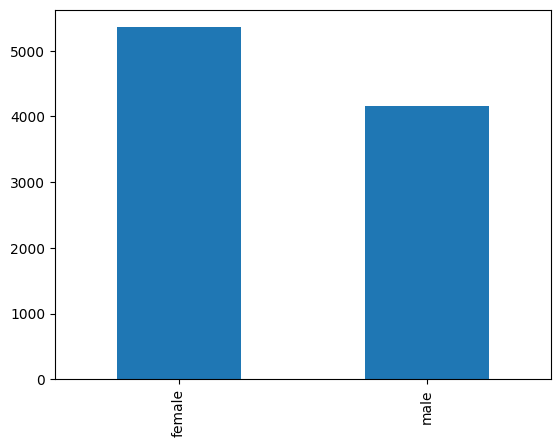

In [21]:
# диаграммы частот для категориальных признаков
df['sex'].value_counts().plot(kind='bar')

<Axes: >

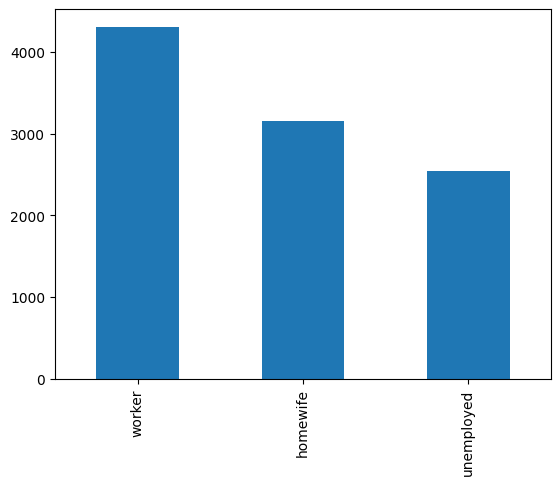

In [22]:
df['profession'].value_counts().plot(kind='bar')

<ipython-input-23-6e341b683a46>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  hm = sns.heatmap(df.corr(), cbar=True, annot=True)


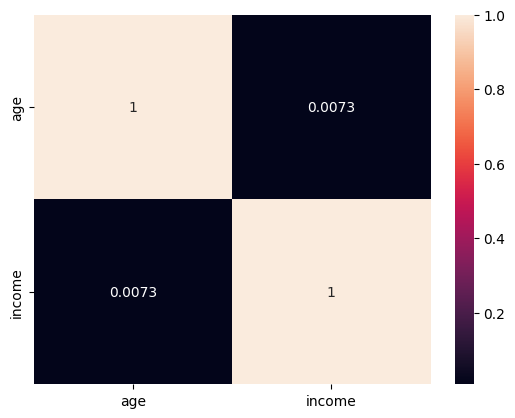

In [23]:
# корреляционная матрица
hm = sns.heatmap(df.corr(), cbar=True, annot=True)

### 3. Предобработка

In [24]:
# Удаление выбросов

low = .25
high = .75

filt_df = df

quant_low  = filt_df.quantile(low, axis=0)
quant_high = filt_df.quantile(high, axis=0)

interquartile_range = (quant_high - quant_low) * 1.5

min_val = quant_low - interquartile_range
max_val = quant_high + interquartile_range

for key in min_val.keys():
  filt_df = filt_df.loc[(filt_df[key] >= min_val[key]) & (filt_df[key] <= max_val[key])]

filt_df

<ipython-input-24-f86411afd84e>:8: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  quant_low  = filt_df.quantile(low, axis=0)
<ipython-input-24-f86411afd84e>:9: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  quant_high = filt_df.quantile(high, axis=0)


,age,sex,profession,income
0,35.0,female,homewife,51667.0
1,26.0,female,homewife,52381.0
2,43.0,female,worker,91316.0
3,35.0,female,homewife,51667.0
4,33.0,female,homewife,51786.0
...,...,...,...,...
9995,43.0,male,worker,111316.0
9996,28.0,male,unemployed,67174.0
9997,40.0,male,unemployed,66429.0
9998,37.0,male,unemployed,66562.0


In [25]:
filt_df.shape

(9408, 4)

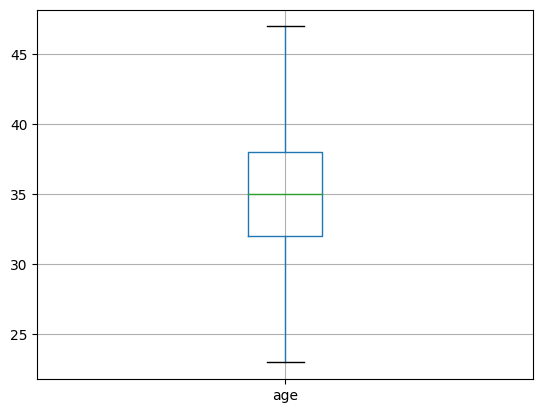

In [26]:
# "ящик с усами" для кол-ых признаков
boxplot_age = filt_df.boxplot(column=['age'])

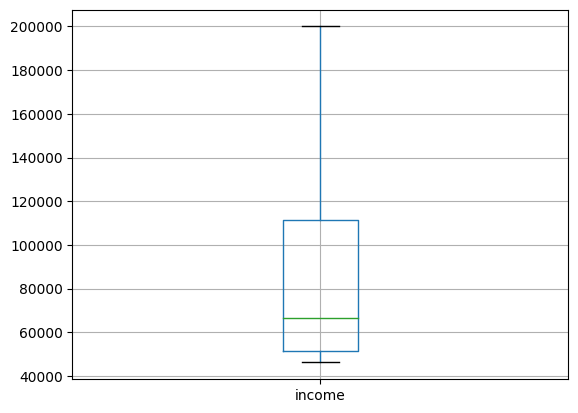

In [27]:
boxplot_income = filt_df.boxplot(column=['income'])

In [28]:
# # удаление дубликатов
# filt_df = filt_df.drop_duplicates(keep='first')
# filt_df

In [29]:
# OneHot-кодирование категориальных признаков
filt_df = pd.get_dummies(filt_df)
filt_df

,age,income,sex_female,sex_male,profession_homewife,profession_unemployed,profession_worker
0,35.0,51667.0,1,0,1,0,0
1,26.0,52381.0,1,0,1,0,0
2,43.0,91316.0,1,0,0,0,1
3,35.0,51667.0,1,0,1,0,0
4,33.0,51786.0,1,0,1,0,0
...,...,...,...,...,...,...,...
9995,43.0,111316.0,0,1,0,0,1
9996,28.0,67174.0,0,1,0,1,0
9997,40.0,66429.0,0,1,0,1,0
9998,37.0,66562.0,0,1,0,1,0


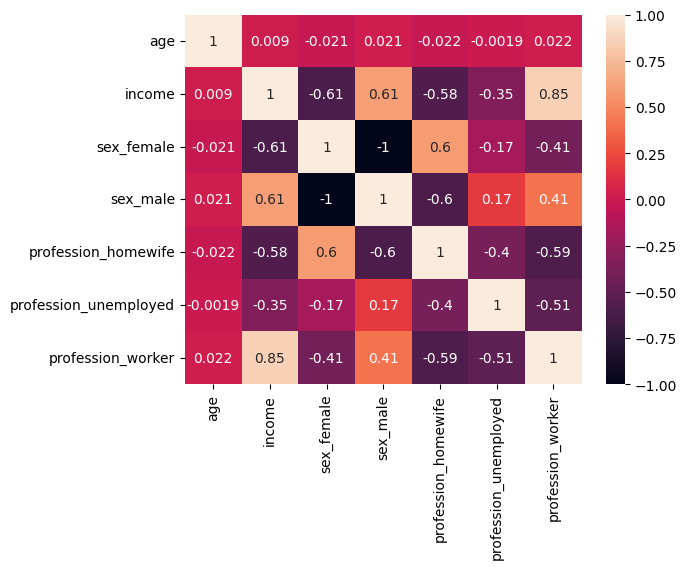

In [30]:
# визуализация корреляции
hm = sns.heatmap(filt_df.corr(), cbar=True, annot=True)

In [31]:
df = filt_df
df

,age,income,sex_female,sex_male,profession_homewife,profession_unemployed,profession_worker
0,35.0,51667.0,1,0,1,0,0
1,26.0,52381.0,1,0,1,0,0
2,43.0,91316.0,1,0,0,0,1
3,35.0,51667.0,1,0,1,0,0
4,33.0,51786.0,1,0,1,0,0
...,...,...,...,...,...,...,...
9995,43.0,111316.0,0,1,0,0,1
9996,28.0,67174.0,0,1,0,1,0
9997,40.0,66429.0,0,1,0,1,0
9998,37.0,66562.0,0,1,0,1,0


### 4. Обучение модели

In [46]:
# разбиение на train и test
X = df.loc[:, df.columns != 'income']
Y = df['income']

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
reg = LinearRegression().fit(X_train, y_train)

In [48]:
print("R2-train:", reg.score(X_train, y_train))
print("R2-test:", reg.score(X_test, y_test))

R2-train: 0.8207372858326665
R2-test: 0.7934287517798974


In [49]:
print(reg.coef_)
print(reg.intercept_)

[   -77.5329995  -10079.52531294  10079.52531294 -11927.3896286
 -15890.60443147  27817.99406007]
77356.01981155408


In [52]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor().fit(X_train, y_train)

In [55]:
regr.feature_importances_

array([0.00428003, 0.10511594, 0.        , 0.00201704, 0.        ,
       0.88858698])

In [36]:
# # гистограммы распределения ошибок
# errs = []

# for index, row in X_train.iterrows():
#   error = y_train[index] - reg.predict([X_train.loc[index]])[0]
#   errs.append(error)

# train_errs=pd.DataFrame({'Train': errs})
# train_errs.hist()

In [37]:
# # гистограммы распределения ошибок
# errs = []

# for index, row in X_test.iterrows():
#   error = y_test[index] - reg.predict([X_test.loc[index]])[0]
#   errs.append(error)

# test_errs=pd.DataFrame({'Test': errs})
# test_errs.hist()

In [38]:
from sklearn.decomposition import PCA

n_comp = 4

pca = PCA(n_components = n_comp)
data_pca = pca.fit_transform(X)
X_trans = pd.DataFrame(data_pca, columns=[f'PC{x}' for x in range(1, n_comp + 1)])
X_trans.head()

,PC1,PC2,PC3,PC4
0,0.055949,0.991864,-0.089317,-0.328013
1,-8.943964,0.952939,-0.096862,-0.325134
2,8.060306,0.181517,-0.636334,0.659093
3,0.055949,0.991864,-0.089317,-0.328013
4,-1.944032,0.983214,-0.090993,-0.327373


In [39]:
! pip install catboost

In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_trans, Y, test_size=0.3, random_state=42)

reg = CatBoostRegressor().fit(X_train, y_train)

In [41]:
print("R2-train:", reg.score(X_train, y_train))
print("R2-test:", reg.score(X_test, y_test))

R2-train: 0.8241087528456223
R2-test: 0.7892582498301026


In [42]:
# # гистограммы распределения ошибок
# errs = []

# for index, row in X_train.iterrows():
#   error = y_train[index] - reg.predict([X_train.loc[index]])[0]
#   errs.append(error)

# train_errs=pd.DataFrame({'Train': errs})
# train_errs.hist()

In [43]:
# # гистограммы распределения ошибок
# errs = []

# for index, row in X_test.iterrows():
#   error = y_test[index] - reg.predict([X_test.loc[index]])[0]
#   errs.append(error)

# test_errs=pd.DataFrame({'Test': errs})
# test_errs.hist()